# Imported Libraeies

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

# Paths

In [6]:
train_dir = r"C:\Users\Destiny\Downloads\Intel Classifier\archive\seg_train\seg_train"
test_dir = r"C:\Users\Destiny\Downloads\Intel Classifier\archive\seg_test\seg_test"
img_size = (224, 224)
batch_size = 32

# Data Generators

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


# Build model

In [8]:
base_model = MobileNetV2(
    include_top=False,
    input_shape=(img_size[0], img_size[1], 3),
    weights='imagenet'
)
base_model.trainable = False  # Freeze base model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


# Callbacks

In [9]:
checkpoint = ModelCheckpoint(
    'intel_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    mode='max',
    verbose=1
)

# Train model

In [ ]:
history = model.fit(
    train_gen,
    epochs=20,
    validation_data=test_gen,
    callbacks=[checkpoint, early_stop]
)

c:\Users\Destiny\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 894ms/step - accuracy: 0.8400 - loss: 0.4377
Epoch 1: val_accuracy improved from -inf to 0.90733, saving model to intel_model.h5


439/439 ━━━━━━━━━━━━━━━━━━━━ 463s 1s/step - accuracy: 0.8401 - loss: 0.4375 - val_accuracy: 0.9073 - val_loss: 0.2495
Epoch 2/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 877ms/step - accuracy: 0.9056 - loss: 0.2541
Epoch 2: val_accuracy improved from 0.90733 to 0.91633, saving model to intel_model.h5


439/439 ━━━━━━━━━━━━━━━━━━━━ 444s 1s/step - accuracy: 0.9056 - loss: 0.2541 - val_accuracy: 0.9163 - val_loss: 0.2348
Epoch 3/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 928ms/step - accuracy: 0.9080 - loss: 0.2408
Epoch 3: val_accuracy did not improve from 0.91633
439/439 ━━━━━━━━━━━━━━━━━━━━ 456s 1s/step - accuracy: 0.9080 - loss: 0.2408 - val_accuracy: 0.9150 - val_loss: 0.2288
Epoch 4/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 849ms/step - accuracy: 0.9251 - loss: 0.2014
Epoch 4: val_accuracy did not improve from 0.91633
439/439 ━━━━━━━━━━━━━━━━━━━━ 432s 985ms/step - accuracy: 0.9251 - loss: 0.2014 - val_accuracy: 0.9127 - val_loss: 0.2313
Epoch 5/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 880ms/step - accuracy: 0.9246 - loss: 0.1976
Epoch 5: val_accuracy did not improve from 0.91633
439/439 ━━━━━━━━━━━━━━━━━━━━ 436s 992ms/step - accuracy: 0.9246 - loss: 0.1976 - val_accuracy: 0.9090 - val_loss: 0.2438
Epoch 6/20
 83/439 ━━━━━━━━━━━━━━━━━━━━ 5:41 960ms/step - accuracy: 0.9410 - loss: 0.1625

# Evaluate model

In [ ]:
model = load_model('intel_model.h5')
loss, acc = model.evaluate(test_gen)
print(f"\nTest Accuracy: {acc*100:.2f}%")


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - accuracy: 0.9135 - loss: 0.2198

Test Accuracy: 91.63%


# Results

## Ploting

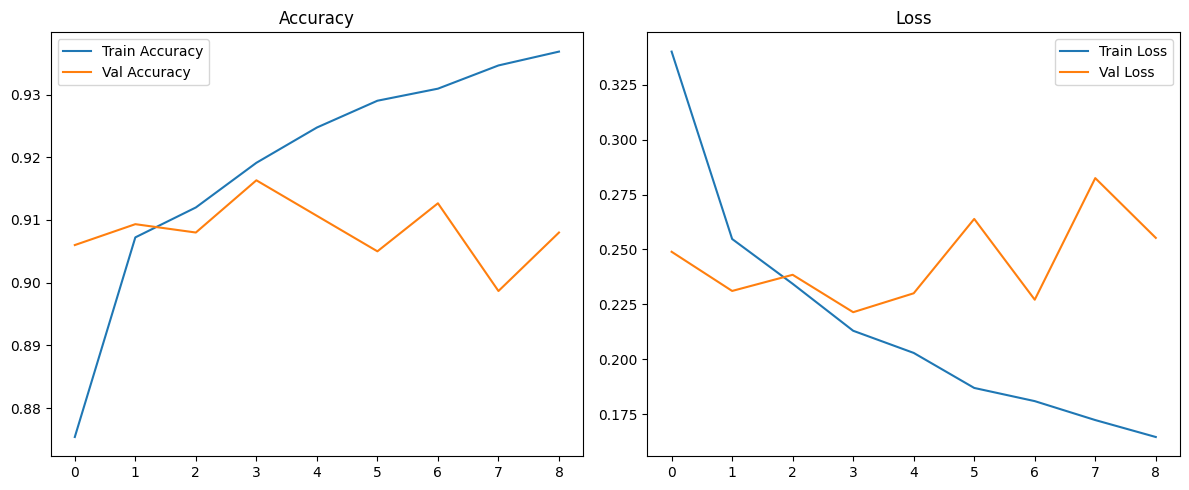

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.savefig("training_plot.png")
plt.show()

# Classification Report & Confusion Matrix


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step

Classification Report:
              precision    recall  f1-score   support

   buildings       0.95      0.90      0.92       437
      forest       0.99      0.99      0.99       474
     glacier       0.85      0.86      0.86       553
    mountain       0.88      0.83      0.85       525
         sea       0.93      0.97      0.95       510
      street       0.92      0.95      0.94       501

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



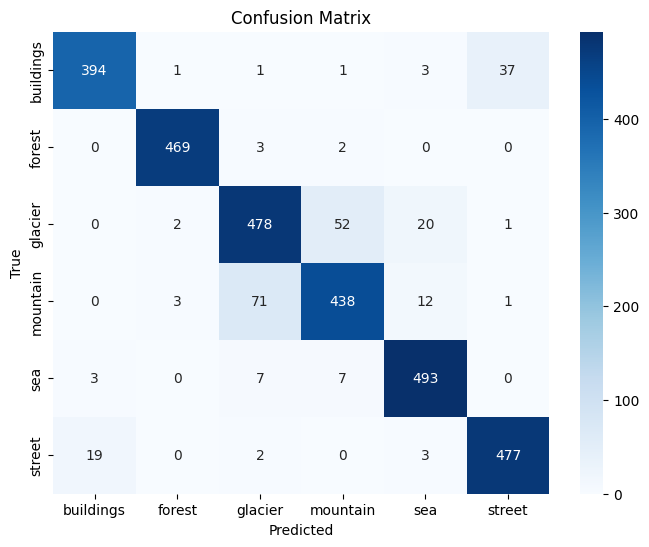

In [ ]:
y_true = test_gen.classes
y_pred_probs = model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)

from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=list(test_gen.class_indices.keys())))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(test_gen.class_indices.keys()),
            yticklabels=list(test_gen.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix.png")
plt.show()

In [ ]:
model.save('/kaggle/Output/model.h5')